In [95]:
### import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [96]:
## import dataset
nat_gas = pd.read_csv('Nat_Gas.csv')
nat_gas.head()

,Dates,Prices
0,10/31/20,10.1
1,11/30/20,10.3
2,12/31/20,11.0
3,1/31/21,10.9
4,2/28/21,10.9


In [97]:
nat_gas.tail()

,Dates,Prices
43,5/31/24,11.4
44,6/30/24,11.5
45,7/31/24,11.6
46,8/31/24,11.5
47,9/30/24,11.8


The data is sorted chronologically from october 2020 - september 2024

In [98]:
# split dates into year, month, day - that way we can see if there are any trends by year, month, or day
nat_gas['Year'] = pd.DatetimeIndex(nat_gas['Dates']).year
nat_gas['Month'] = pd.DatetimeIndex(nat_gas['Dates']).month
nat_gas['Day'] = pd.DatetimeIndex(nat_gas['Dates']).day
nat_gas.drop('Dates', axis=1, inplace=True)
nat_gas.head()

,Prices,Year,Month,Day
0,10.1,2020,10,31
1,10.3,2020,11,30
2,11.0,2020,12,31
3,10.9,2021,1,31
4,10.9,2021,2,28


In [99]:
nat_gas.describe()

,Prices,Year,Month,Day
count,48.000000,48.000000,48.000000,48.000000
mean,11.207083,2022.250000,6.500000,30.437500
std,0.757897,1.211646,3.488583,0.822716
min,9.840000,2020.000000,1.000000,28.000000
25%,10.650000,2021.000000,3.750000,30.000000
50%,11.300000,2022.000000,6.500000,31.000000
75%,11.625000,2023.000000,9.250000,31.000000
max,12.800000,2024.000000,12.000000,31.000000


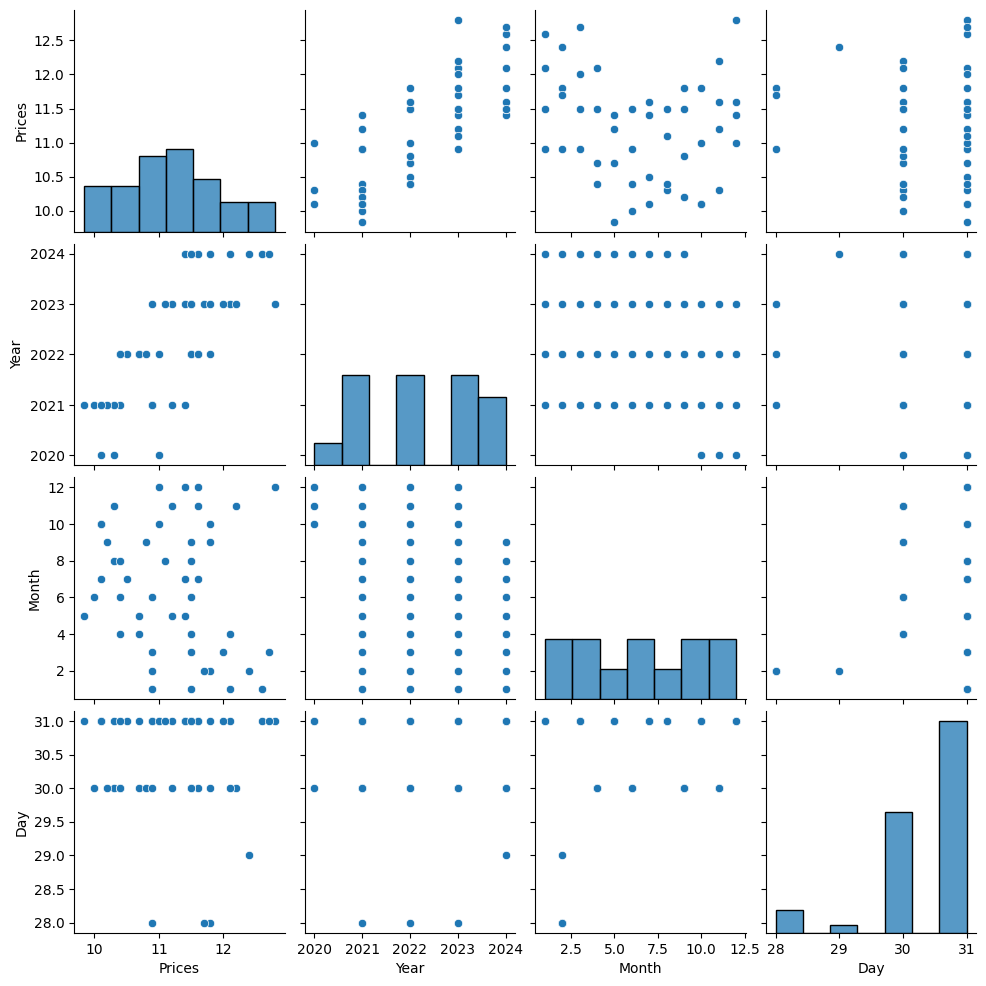

In [100]:
sns.pairplot(nat_gas)

* In comparing PricexYear - the prices increase as the years continue. this is to be expected (inflation, etc.)
* Interestingly, data is only collected at the end of the month (DayxMonth)
* Prices dip in the summer and increase in winter (PricexMonth)
* Price ranges fromm 9.84 to 12.80

In [101]:
# begin to build model
# split data into training and test sets
from sklearn.model_selection import train_test_split
X = nat_gas.drop('Prices', axis=1) # drop the target variable for the training set
y = nat_gas['Prices']           # set the target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101) # 70% training and 30% test

# train the model - Linear regression since we are predicting a continuous variable
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

# print the intercept
print("intercept = ", lm.intercept_)
# print the coefficients
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df


intercept =  -889.0649919384485


,Coefficient
Year,0.445135
Month,-0.000265
Day,0.004299


In [102]:
predictedPrice = lm.predict(X_test)
predictedPrice

array([11.57449928, 11.12989406, 11.12612513, 11.57396912, 11.12665529,
       10.23452898, 12.01639589, 11.13015914, 11.11858727, 12.0204299 ,
       12.02096005, 10.68555392, 12.01315711, 10.68661424, 12.02202037])